In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
os.chdir(r'C:/Users/cyb/ipnb/haha/280_Ben_八大直播八大案例配套课件/第三章/提交-第三讲：信用卡客户特征分析-产品客户画像初步/数据与脚本/5Preprocessing/')

In [3]:
camp = pd.read_csv('teleco_camp_orig.csv')
camp.head()

,ID,Suc_flag,ARPU,PromCnt12,PromCnt36,PromCntMsg12,PromCntMsg36,Class,Age,Gender,HomeOwner,AvgARPU,AvgHomeValue,AvgIncome
0,12,1,50.0,6,10,2,3,4,57.0,M,H,49.894904,33400,39460
1,53,0,NaN,5,9,1,4,3,55.0,M,H,48.574742,37600,33545
2,67,1,25.0,6,11,2,4,1,57.0,F,H,49.272646,100400,42091
3,71,1,80.0,7,10,2,4,1,52.0,F,H,47.334953,39900,39313
4,142,1,15.0,6,11,2,4,1,NaN,F,U,47.827404,47500,0


In [4]:
import matplotlib.pyplot as plt

count      9686.000000
mean      40491.444249
std       28707.494146
min           0.000000
25%       24464.000000
50%       43100.000000
75%       56876.000000
max      200001.000000
Name: AvgIncome, dtype: float64

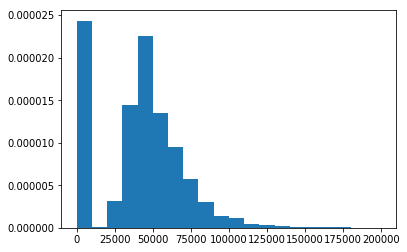

In [5]:
plt.hist(camp['AvgIncome'], bins=20, density=True)
camp['AvgIncome'].describe(include='all')
# 最小值是 0 ，平均收入为 0 不符合常理，直方图中大部分是合理的，左偏，为 0 的明显是异常值

C:\Users\cyb\Anaconda3\envs\py3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\cyb\Anaconda3\envs\py3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


count      7329.000000
mean      53513.457361
std       19805.168339
min        2499.000000
25%       40389.000000
50%       48699.000000
75%       62385.000000
max      200001.000000
Name: AvgIncome, dtype: float64

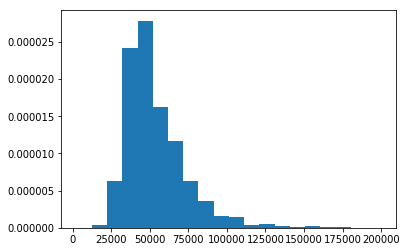

In [6]:
# 将 0 替换为 nan
camp['AvgIncome'] = camp['AvgIncome'].replace({0: np.nan})
plt.hist(camp['AvgIncome'], bins=20, density=True, range=(camp.AvgIncome.min(), camp.AvgIncome.max()))
camp['AvgIncome'].describe(include='all')

count      9686.000000
mean     110986.299814
std       98670.855450
min           0.000000
25%       52300.000000
50%       76900.000000
75%      128175.000000
max      600000.000000
Name: AvgHomeValue, dtype: float64

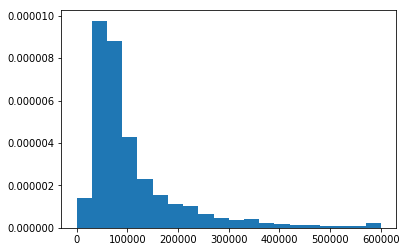

In [7]:
plt.hist(camp['AvgHomeValue'], bins=20, density=True)#查看分布情况
camp['AvgHomeValue'].describe(include='all')

count      9583.000000
mean     112179.202755
std       98522.888583
min        7500.000000
25%       53200.000000
50%       77700.000000
75%      129350.000000
max      600000.000000
Name: AvgHomeValue, dtype: float64

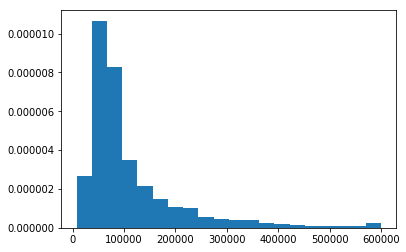

In [8]:
camp['AvgHomeValue'] = camp['AvgHomeValue'].replace({0: np.nan})
plt.hist(camp['AvgHomeValue'], bins=20, density=True, range=(camp.AvgHomeValue.min(),camp.AvgHomeValue.max()))
# 由于数据存在缺失值，需要制定绘图的区域
camp['AvgHomeValue'].describe(include='all')

In [11]:
camp['dup'] = camp.duplicated()
camp.dup.sum()

0

In [12]:
camp_dup = camp[camp['dup'] == True]
camp_nodup = camp[camp['dup'] == False]
camp_nodup.head()

,ID,Suc_flag,ARPU,PromCnt12,PromCnt36,PromCntMsg12,PromCntMsg36,Class,Age,Gender,HomeOwner,AvgARPU,AvgHomeValue,AvgIncome,dup
0,12,1,50.0,6,10,2,3,4,57.0,M,H,49.894904,33400.0,39460.0,False
1,53,0,NaN,5,9,1,4,3,55.0,M,H,48.574742,37600.0,33545.0,False
2,67,1,25.0,6,11,2,4,1,57.0,F,H,49.272646,100400.0,42091.0,False
3,71,1,80.0,7,10,2,4,1,52.0,F,H,47.334953,39900.0,39313.0,False
4,142,1,15.0,6,11,2,4,1,NaN,F,U,47.827404,47500.0,NaN,False


In [13]:
camp.describe()

,ID,Suc_flag,ARPU,PromCnt12,PromCnt36,PromCntMsg12,PromCntMsg36,Class,Age,AvgARPU,AvgHomeValue,AvgIncome
count,9686.000000,9686.000000,4843.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,7279.000000,9686.000000,9583.000000,7329.000000
mean,97975.474086,0.500000,78.121722,3.495251,7.466963,1.034586,2.323044,2.424530,49.567386,52.905156,112179.202755,53513.457361
std,56550.171120,0.500026,62.225686,1.270258,1.977909,0.244171,0.904083,1.049047,6.991306,4.993775,98522.888583,19805.168339
min,12.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,16.000000,46.138968,7500.000000,2499.000000
25%,48835.500000,0.000000,50.000000,3.000000,6.000000,1.000000,1.000000,2.000000,45.000000,49.760116,53200.000000,40389.000000
50%,99106.000000,0.500000,65.000000,3.000000,8.000000,1.000000,3.000000,2.000000,50.000000,50.876672,77700.000000,48699.000000
75%,148538.750000,1.000000,100.000000,4.000000,8.000000,1.000000,3.000000,3.000000,55.000000,54.452822,129350.000000,62385.000000
max,191779.000000,1.000000,1000.000000,15.000000,20.000000,4.000000,6.000000,4.000000,60.000000,99.444787,600000.000000,200001.000000


In [15]:
vmean = camp['Age'].mean(axis=0, skipna=True)# 跳过缺失值
camp['Age_empflag'] = camp['Age'].isnull()
camp['Age'] = camp['Age'].fillna(vmean)
camp['Age'].describe()
# 虚拟指标和经过补全的数据都进行建模，让模型决定那个比较有用

count    9686.000000
mean       49.567386
std         6.060585
min        16.000000
25%        47.000000
50%        49.567386
75%        54.000000
max        60.000000
Name: Age, dtype: float64

In [17]:
vmean = camp['AvgHomeValue'].mean(axis=0, skipna=True)# 跳过缺失值
camp['AvgHomeValue_empflag'] = camp['AvgHomeValue'].isnull()
camp['AvgHomeValue'] = camp['AvgHomeValue'].fillna(vmean)
camp['AvgHomeValue'].describe()

count      9686.000000
mean     112179.202755
std       97997.592632
min        7500.000000
25%       53500.000000
50%       78450.000000
75%      128175.000000
max      600000.000000
Name: AvgHomeValue, dtype: float64

In [18]:
def blk(floor, root):# 小于 floor 用 floor 替代，大于 root 的用 root 替代
    def f(x):
        if x < floor:
            x = floor
        elif x > root:
            x = root
        return x
    return f

In [19]:
q1 = camp['Age'].quantile(0.1)
q2 = camp['Age'].quantile(0.99)
blk_tot = blk(q1, q2)
camp['Age'].map(blk_tot)
camp['Age'].describe()

count    9686.000000
mean       49.567386
std         6.060585
min        16.000000
25%        47.000000
50%        49.567386
75%        54.000000
max        60.000000
Name: Age, dtype: float64

In [27]:
camp['Age_group1'] = pd.qcut(camp['Age'], 4) # 等深分箱
camp.Age_group1.head()

0      (54.0, 60.0]
1      (54.0, 60.0]
2      (54.0, 60.0]
3    (49.567, 54.0]
4    (47.0, 49.567]
Name: Age_group1, dtype: category
Categories (4, interval[float64]): [(15.999, 47.0] < (47.0, 49.567] < (49.567, 54.0] < (54.0, 60.0]]

In [24]:
camp['Age_group2'] = pd.cut(camp['Age'], 4) # 等宽分箱
camp.Age_group2.head()

0    (49.0, 60.0]
1    (49.0, 60.0]
2    (49.0, 60.0]
3    (49.0, 60.0]
4    (49.0, 60.0]
Name: Age_group2, dtype: category
Categories (4, interval[float64]): [(15.956, 27.0] < (27.0, 38.0] < (38.0, 49.0] < (49.0, 60.0]]

In [28]:
camp.to_csv('tele_camp_ok.xlsx')